# Tugas Pairing 2 Knowledge Discovery 
#### Priscilla Green Samosir - 212100332
#### Rachel Clarissa Mehuli Nababan - 212100305

In [19]:
import pandas as pd

# Baca file Excel Orders
df_orders = pd.read_excel('Orders.xlsx')

# Baca file Excel Order Details
df_order_details = pd.read_excel('Order Details.xlsx')

# Gabungkan kedua data berdasarkan kolom Order ID
df_merged = pd.merge(df_orders, df_order_details, on='Order ID')

# Pilih kolom yang diperlukan (Order ID, Ship Country, dan Product Name)
df_selected_columns = df_merged[['Order ID', 'Ship Country', 'Product']]

# Simpan hasil gabungan ke dalam file Excel baru
df_selected_columns.to_excel('Orders_Ship_Country_Products.xlsx', index=False, encoding='utf-8')

print("File baru 'Orders_Ship_Country_Products.xlsx' telah berhasil disimpan.")


File baru 'Orders_Ship_Country_Products.xlsx' telah berhasil disimpan.


# Algoritma asosiasi 

## 1A. Aturan Transaksi dari Negara-negara Eropa 

Kami menggabungkan Order ID, Product dan Ship country ke dalam satu file excel baru dengan nama Order_Ship_Country_Product
- Order ID: ID yang diberikan setiap kali negara-negara tersebut melakukan transaksi. 
- Ship Country: Nama-nama negara baik eropa dan non eropa yang melakukan transaksi. 
- Product Name: Nama-nama produk yang diberikan oleh negara-negara tersebut. 


In [23]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Baca file Excel Orders_Ship_Country_Products
df = pd.read_excel('Orders_Ship_Country_Products.xlsx')

# Filter data untuk hanya negara-negara Eropa
df_europe = df[df['Ship Country'].isin(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden'])]

# Ubah data menjadi format one-hot encoding
basket = (df_europe.groupby(['Order ID', 'Product'])['Product']
          .count().unstack().reset_index().fillna(0)
          .set_index('Order ID'))

# Ubah integer menjadi 1 dan 0
basket_sets = basket.applymap(lambda x: 1 if x > 0 else 0)

# Gunakan algoritma Apriori untuk menemukan asosiasi
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

# Temukan aturan asosiasi
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Tampilkan aturan transaksi
print(rules)

             antecedents            consequents  antecedent support  \
0       (Tarte au sucre)              (Pavlova)            0.054118   
1              (Pavlova)       (Tarte au sucre)            0.051765   
2  (Sir Rodney's Scones)       (Sirop d'érable)            0.051765   
3       (Sirop d'érable)  (Sir Rodney's Scones)            0.035294   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.051765  0.011765    0.217391  4.199605  0.008963    1.211634   
1            0.054118  0.011765    0.227273  4.199605  0.008963    1.224083   
2            0.035294  0.011765    0.227273  6.439394  0.009938    1.248443   
3            0.051765  0.011765    0.333333  6.439394  0.009938    1.422353   

   zhangs_metric  
0       0.805473  
1       0.803474  
2       0.890819  
3       0.875610  


C:\Users\prisc\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


## Kesimpulan 

Dari hasil yang kami analisis maka didapatkan untuk produk yang dibeli oleh negara-negara eropa secara keseluruhan ialah jika membeli Tarte au sucre maka membeli Pavlova dan sebaliknya kemudian jika membeli Sir Rodney’s Scones maka membeli Sirop d’erable dan sebaliknya. 


## 1B. Aturan Transaksi dari Negara-negara Non-Eropa 

Kami menggabungkan Order ID, Product dan Ship country ke dalam satu file excel baru dengan nama Order_Ship_Country_Product
- Order ID: ID yang diberikan setiap kali negara-negara tersebut melakukan transaksi. 
- Ship Country: Nama-nama negara baik eropa dan non eropa yang melakukan transaksi. 
- Product Name: Nama-nama produk yang diberikan oleh negara-negara tersebut. 


In [6]:

import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Baca file Excel Orders_Ship_Country_Products
df = pd.read_excel('Orders_Ship_Country_Products.xlsx')

# Filter data untuk hanya negara-negara Eropa
df_non_europe = df[df['Ship Country'].isin(['Brazil', 'Venezuela', 'Mexico', 'USA', 'UK', 'Ireland', 'Canada', 'Argentina'])]

# Ubah data menjadi format one-hot encoding
basket = (df_non_europe.groupby(['Order ID', 'Product'])['Product']
          .count().unstack().reset_index().fillna(0)
          .set_index('Order ID'))

# Ubah integer menjadi 1 dan 0
basket_sets = basket.applymap(lambda x: 1 if x > 0 else 0)

# Gunakan algoritma Apriori untuk menemukan asosiasi
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

# Temukan aturan asosiasi
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Tampilkan aturan transaksi
print(rules)


                           antecedents                         consequents  \
0                            (Geitost)                      (Alice Mutton)   
1                       (Alice Mutton)                           (Geitost)   
2                       (Alice Mutton)                    (Tarte au sucre)   
3                     (Tarte au sucre)                      (Alice Mutton)   
4                            (Pavlova)                 (Camembert Pierrot)   
5                  (Camembert Pierrot)                           (Pavlova)   
6                        (Fløtemysost)                              (Chai)   
7                               (Chai)                       (Fløtemysost)   
8   (Louisiana Fiery Hot Pepper Sauce)                       (Fløtemysost)   
9                        (Fløtemysost)  (Louisiana Fiery Hot Pepper Sauce)   
10                           (Pavlova)                 (Gorgonzola Telino)   
11                 (Gorgonzola Telino)                          

C:\Users\prisc\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


## Kesimpulan 

Dari hasil yang kami analisis maka didapatkan untuk produk yang dibeli oleh negara-negara non-eropa secara keseluruhan ialah jika membeli Geitost maka membeli Alice Mutton dan sebaliknya kemudian seterusnya seperti yang ditampilkan di atas. 


# Algoritma Kmeans

## Mengelompokan Produk restock dan tidak sekaligus menentukan prioritas restock

Subset yang digunakan terdiri dari dua fitur, yaitu "Units On Order" yang merupakan jumlah barang yang dipesan oleh pelanggan dan "Units In Stock" yang merupakan jumlah barang yang masih tersedia di toko.


Hasil performa analisis K-Means:
Inertia: 23830.438735177864


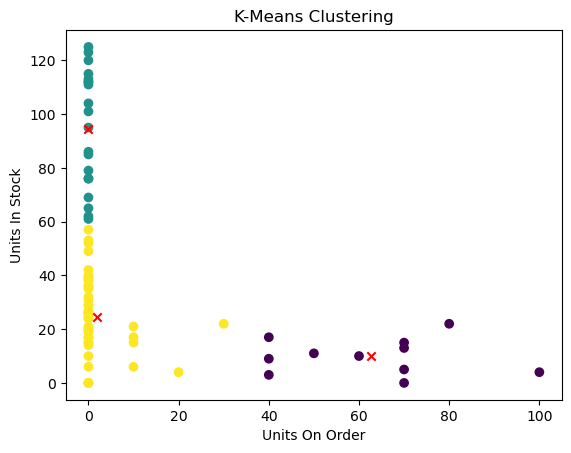

In [45]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Membaca dataset Products.xlsx
products_data = pd.read_excel('Products.xlsx')

# 1. Menyiapkan subset untuk analisis K-Means
kmeans_subset = products_data[['Units On Order', 'Units In Stock']]  # Menggunakan nama kolom yang sesuai

# 2. Melakukan analisis K-Means
kmeans = KMeans(n_clusters=3)
kmeans.fit(kmeans_subset)
kmeans_labels = kmeans.labels_

# 3. Hasil performa
print("\nHasil performa analisis K-Means:")
inertia = kmeans.inertia_
print("Inertia:", inertia)

# 4. Visualisasi hasil analisis K-Means
plt.scatter(kmeans_subset['Units On Order'], kmeans_subset['Units In Stock'], c=kmeans_labels, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x')
plt.xlabel('Units On Order')
plt.ylabel('Units In Stock')
plt.title('K-Means Clustering')
plt.show()



## Kesimpulan 

Dari analisis tersebut, dapat disimpulkan bahwa ada hubungan saling memengaruhi antara jumlah restock produk dengan jumlah order dan stok produk. Produk dengan tingkat order yang tinggi cenderung membutuhkan restock yang lebih sering, dan sebaliknya. Informasi ini dapat digunakan untuk menentukan prioritas restock dan mengelola stok dengan lebih efisien.

# Algoritma Neural Network

## Memprediksi jumlah reorder 

Subset yang digunakan terdiri dari dua fitur, yaitu "Units On Order" yang merupakan jumlah barang yang dipesan oleh pelanggan dan "Units In Stock" yang merupakan jumlah barang yang masih tersedia di toko.

Epoch [100/1000], Training Loss: 237.7722, Test Loss: 169.6194
Epoch [200/1000], Training Loss: 170.2729, Test Loss: 112.4794
Epoch [300/1000], Training Loss: 118.0844, Test Loss: 75.4825
Epoch [400/1000], Training Loss: 103.3340, Test Loss: 71.2098
Epoch [500/1000], Training Loss: 100.5322, Test Loss: 70.9566
Epoch [600/1000], Training Loss: 98.5731, Test Loss: 68.9098
Epoch [700/1000], Training Loss: 96.7509, Test Loss: 66.6791
Epoch [800/1000], Training Loss: 95.0935, Test Loss: 64.6691
Epoch [900/1000], Training Loss: 93.6819, Test Loss: 63.0790
Epoch [1000/1000], Training Loss: 92.5685, Test Loss: 61.9564


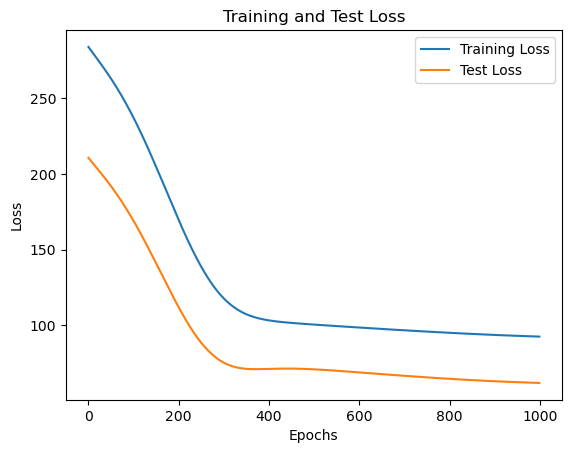

Prediksi Reorder Level untuk Data Uji:
tensor([[0.0684],
        [0.1913],
        [0.1479],
        [0.1105],
        [0.1725],
        [0.2111],
        [0.1249],
        [0.0905],
        [0.0894],
        [0.0684],
        [0.0961],
        [0.2057],
        [0.0950],
        [0.0939],
        [0.1548],
        [0.1902]])


In [44]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Membaca dataset Products.xlsx 
products_data = pd.read_excel('Products.xlsx')

# Memilih fitur yang digunakan untuk prediksi
X = products_data[['Units On Order', 'Units In Stock']].values
y = products_data['Reorder Level'].values

# Normalisasi fitur
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Konversi data ke tensor PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Bangun Model Neural Network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 64)
        self.fc2 = nn.Linear(64, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleNN()

# Fungsi loss dan optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Latih model
num_epochs = 1000
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor.unsqueeze(1))
    loss.backward()
    optimizer.step()
    
    train_losses.append(loss.item())
    
    # Evaluasi pada data uji
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor.unsqueeze(1))
        test_losses.append(test_loss.item())
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

# Plot loss
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()

# Menggunakan model untuk membuat prediksi pada data uji
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    
# Mengonversi hasil prediksi kembali ke dalam skala semula (jika perlu)
predicted_reorder_level = test_outputs * scaler.scale_[0] + scaler.min_[0]

print("Prediksi Reorder Level untuk Data Uji:")
print(predicted_reorder_level)


Dari hasil pelatihan model Neural Network, terlihat bahwa terjadi penurunan nilai loss (kerugian) pada data latih dan data uji seiring dengan peningkatan jumlah epoch. Hal ini menunjukkan bahwa model kita berhasil belajar dari data dan mampu mengurangi kesalahan prediksi. Selain itu, prediksi reorder level untuk data uji memberikan gambaran tentang kinerja model dalam memprediksi kebutuhan reorder untuk produk-produk tertentu. Dengan demikian, dapat disimpulkan bahwa model Neural Network yang telah dibangun mampu memberikan prediksi yang cukup akurat terkait dengan tingkat persediaan dan kebutuhan reorder produk. Hal ini dapat membantu toko Northwind dalam mengelola stok barang secara lebih efisien dan efektif.